# Анализ данных из Росстат


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# загрузка данных
stat_data = pd.read_excel('https://rosstat.gov.ru/storage/mediabank/cen-god.xls', skiprows=2,decimal=',').dropna()
stat_data.head(10)

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547.0,14137.0,15787.0,30.04,42.01,...,197.64,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053.0,16810.0,19055.0,33.99,43.37,...,198.35,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587.0,13815.0,16061.0,30.74,39.28,...,105.14,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13
4,Колбаса вареная2),17,271,3351.3,8984.10,20016.0,22859.0,26767.0,43.81,61.56,...,235.96,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37
5,"Консервы мясные3), 350 г",8.87,163.9,1165.48,2991.46,6692.0,7375.0,7811.0,15.50,18.16,...,63.79,70.35,75.22,79.33,94.42,117.04,121.37,125.21,130.13,139.47
6,Рыба мороженая неразделанная4),2.32,129.5,1088.73,3675.17,8325.0,9398.0,9912.0,18.93,23.83,...,79.22,86.79,85.67,90.79,110.65,138.16,147.68,153.03,152.14,170.13
7,"Рыба соленая, маринованная, копченая",5.72,272.6,2598.96,7495.95,17488.0,19912.0,21402.0,32.13,47.89,...,215.55,247.73,247.61,252.52,292.21,352.58,382.54,388.83,398.24,424.54
8,Консервы рыбные натуральные и с добавлением ма...,3.91,120,1040.71,3211.18,8050.0,8540.0,8468.0,13.85,19.96,...,51.46,53.95,57.76,60.50,70.12,91.94,103.94,109.09,113.71,119.69
9,Масло сливочное 5),12.24,413,2912.58,12984.99,20075.0,22968.0,23238.0,64.44,66.83,...,239.55,256.48,260.84,308.92,357.54,397.75,477.13,528.83,553.02,613.39
10,Масло подсолнечное 6),5.48,190,1364.9,5306.54,10460.0,8412.0,9589.0,23.43,25.74,...,72.60,76.79,78.51,75.47,78.09,107.62,110.1,100.16,101.51,98.57


In [3]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 86
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    ПОКАЗАТЕЛИ   78 non-null     object 
 1   1991          78 non-null     object 
 2   1992          78 non-null     object 
 3   1993          78 non-null     object 
 4   1994          78 non-null     float64
 5   1995          78 non-null     float64
 6   1996          78 non-null     float64
 7   1997          78 non-null     float64
 8   1998          78 non-null     float64
 9   1999          78 non-null     float64
 10  2000          78 non-null     float64
 11  2001          78 non-null     float64
 12  2002          78 non-null     float64
 13  2003          78 non-null     float64
 14  2004          78 non-null     float64
 15  2005          78 non-null     float64
 16  2006          78 non-null     float64
 17  2007          78 non-null     float64
 18  2008          78 non-null     fl

In [4]:
stat_data.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019],
      dtype='object')

In [5]:
# приведение значений ключей столбцов в единый строковой тип
stat_data.columns = stat_data.columns.astype('str')
stat_data.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [6]:
# транспонирование таблицы
stat_data = stat_data.T
stat_data.head()

,1,2,3,4,5,6,7,8,9,10,...,76,78,79,80,81,82,83,84,85,86
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18


In [9]:
# в качестве ключей столбцов устанавливаем значения категорий
stat_data.columns = stat_data.loc[' ПОКАЗАТЕЛИ ', :]
stat_data.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18


In [10]:
stat_data.iloc[:, :10]

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460
1996,14137,16810,13815,22859,7375,9398,19912,8540,22968,8412
1997,15787,19055,16061,26767,7811,9912,21402,8468,23238,9589
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74


In [11]:
# срезаем из таблицы данные до 1998 года, так как там присутсвуют аномальные значения 
stat_data = stat_data.loc['1998':, :]
stat_data.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,1.61,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,2.87,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,4.55,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21


In [12]:
stat_data.iloc[:, 60:]

ПОКАЗАТЕЛИ,"Проезд в троллейбусе, за поездку","Проезд в метро, за поездку","Пересылка простого письма внутри России25), массой до 20 г","Отправка телеграммы обыкновенной внутренней26), за 15 слов","Абонентская плата за неограниченный объем местных телефонных соединений, за месяц","Плата за жилье в домах государственного и муниципального жилищных фондов27), за м2 общей площади","Водоснабжение холодное и водоотведение, за месяц с человека","Горячее водоснабжение, за месяц с человека","Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1998,1.37,2.2,1.09,7.15,28.24,0.66,8.27,9.87,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,1.82,3.08,1.49,8.79,38.83,1,10.87,12.12,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,2.58,4.31,2.18,10.35,52.63,1.3,15.86,18,1.61,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,3.16,4.56,3.11,13.55,66.92,2.15,25.94,30.91,2.87,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,4.27,6.09,4.13,18.49,100.74,3.24,39.04,48.87,4.55,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21
2003,4.63,6.13,4.72,18.45,129.75,4.22,52.32,64.9,6.13,12.34,81.07,58.52,72.06,16.39,631.81,488.84,116.43,66.94
2004,5.42,7.97,5.07,21.11,160.39,5.5,69,80.01,7.32,14.36,93.15,74.73,89.7,19.95,724.84,548.62,138.84,77.96
2005,6.2,10.33,5.6,21.67,189.15,7.5,94.11,110.08,9.77,18.08,110.62,88.63,111.43,26.53,822.07,608.58,171.36,94.6
2006,7.24,11.57,6.48,26.55,191.81,8.87,112.29,129.37,11.39,20.63,129.87,103.34,134.44,33.87,940.57,714.24,197.08,110.21
2007,8.23,13.05,6.49,27.85,277.45,10.06,130.01,149.91,13.03,24.3,145.15,114.32,162.11,37.24,1100.52,844.67,223.27,128.21


In [13]:
# символ - заменяем на 0
stat_data = stat_data.replace('-', 0.0)
stat_data.iloc[:, 60:]

ПОКАЗАТЕЛИ,"Проезд в троллейбусе, за поездку","Проезд в метро, за поездку","Пересылка простого письма внутри России25), массой до 20 г","Отправка телеграммы обыкновенной внутренней26), за 15 слов","Абонентская плата за неограниченный объем местных телефонных соединений, за месяц","Плата за жилье в домах государственного и муниципального жилищных фондов27), за м2 общей площади","Водоснабжение холодное и водоотведение, за месяц с человека","Горячее водоснабжение, за месяц с человека","Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1998,1.37,2.2,1.09,7.15,28.24,0.66,8.27,9.87,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,1.82,3.08,1.49,8.79,38.83,1,10.87,12.12,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,2.58,4.31,2.18,10.35,52.63,1.3,15.86,18.00,1.61,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,3.16,4.56,3.11,13.55,66.92,2.15,25.94,30.91,2.87,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,4.27,6.09,4.13,18.49,100.74,3.24,39.04,48.87,4.55,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21
2003,4.63,6.13,4.72,18.45,129.75,4.22,52.32,64.90,6.13,12.34,81.07,58.52,72.06,16.39,631.81,488.84,116.43,66.94
2004,5.42,7.97,5.07,21.11,160.39,5.5,69.00,80.01,7.32,14.36,93.15,74.73,89.7,19.95,724.84,548.62,138.84,77.96
2005,6.2,10.33,5.6,21.67,189.15,7.5,94.11,110.08,9.77,18.08,110.62,88.63,111.43,26.53,822.07,608.58,171.36,94.6
2006,7.24,11.57,6.48,26.55,191.81,8.87,112.29,129.37,11.39,20.63,129.87,103.34,134.44,33.87,940.57,714.24,197.08,110.21
2007,8.23,13.05,6.49,27.85,277.45,10.06,130.01,149.91,13.03,24.3,145.15,114.32,162.11,37.24,1100.52,844.67,223.27,128.21


In [14]:
# проверка значений dataFrame
stat_data.values

array([[30.04, 33.99, 30.74, ..., 135.41, 41.9, 24.4],
       [42.01, 43.37, 39.28, ..., 197.9, 52.67, 31.22],
       [52.72, 58.45, 48.8, ..., 279.76, 62.97, 37.99],
       ...,
       [320.34, 255.87, 126.29, ..., 1869.65, 683.9, 370.24],
       [330.58, 275.26, 151.27, ..., 1869.54, 724.61, 382.06],
       ['350.05', '264.55', '143.13', ..., '1937.53', '780.86', '398.49']],
      dtype=object)

In [15]:
# конвертирование строковых значений в числовой тип(float)
stat_data = stat_data.astype(np.float32)
stat_data.values

array([[  30.04,   33.99,   30.74, ...,  135.41,   41.9 ,   24.4 ],
       [  42.01,   43.37,   39.28, ...,  197.9 ,   52.67,   31.22],
       [  52.72,   58.45,   48.8 , ...,  279.76,   62.97,   37.99],
       ...,
       [ 320.34,  255.87,  126.29, ..., 1869.65,  683.9 ,  370.24],
       [ 330.58,  275.26,  151.27, ..., 1869.54,  724.61,  382.06],
       [ 350.05,  264.55,  143.13, ..., 1937.53,  780.86,  398.49]],
      dtype=float32)

In [16]:
# проверка ключей столбцов
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [18]:
# удаление лишних символов пробела ("") из ключей столбцов
stat_data.columns = stat_data.columns.str.strip(" ")
stat_data.columns


Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5)', 'Масло подсолнечное 6)',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, за л

In [19]:
# "очищенный" DataFrame можем сохранить в виде нового эксель файла
stat_data.to_excel('prices_stat_data_1998-2019.xlsx')

In [21]:
stat_data['Говядина (кроме бескостного мяса)']

1998     30.040001
1999     42.009998
2000     52.720001
2001     70.330002
2002     72.559998
2003     73.900002
2004     93.410004
2005    115.769997
2006    131.669998
2007    139.490005
2008    174.860001
2009    185.600006
2010    197.639999
2011    234.490005
2012    248.470001
2013    244.550003
2014    272.279999
2015    314.940002
2016    315.019989
2017    320.339996
2018    330.579987
2019    350.049988
Name: Говядина (кроме бескостного мяса), dtype: float32

In [34]:
# в сколько раз изменилась средняя цена на опред. категорию?
stat_data.loc['2019', 'Говядина (кроме бескостного мяса)'] / stat_data.loc['1998', 'Говядина (кроме бескостного мяса)']

11.652796

In [36]:
stat_data.loc['2019', 'Кинотеатры, за билет'] / stat_data.loc['1998', 'Кинотеатры, за билет']

36.14402

In [40]:
stat_data.loc['2019', 'Проезд в метро, за поездку' ] / stat_data.loc['1998', 'Проезд в метро, за поездку']

17.436363

In [46]:
# извлечение данных
prices_1 = stat_data['Говядина (кроме бескостного мяса)']
prices_2 = stat_data['Кинотеатры, за билет']
prices_3 = stat_data['Проезд в метро, за поездку']

In [42]:
# извлекаем года 
years = stat_data.index.astype(int)
years

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

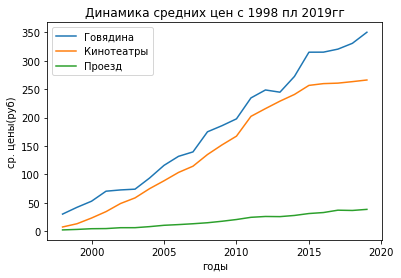

In [48]:
# визуалитзация 

plt.plot(years, prices_1, label='Говядина')
plt.plot(years, prices_2, label='Кинотеатры')
plt.plot(years, prices_3, label='Проезд')
         
plt.legend()
plt.title('Динамика средних цен с 1998 пл 2019гг')
plt.xlabel('годы')
plt.ylabel('ср. цены(руб)')

plt.show()